In [ ]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

# import tensorflow and tensorboard
import tensorflow as tf
from tensorflow import keras
import tensorboard

# Helper libraries
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime

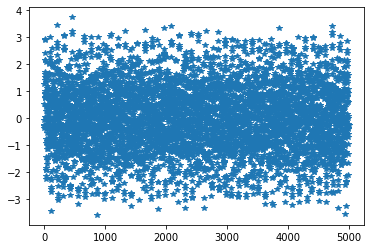

In [ ]:
num_train_data = 4000
num_test_data = 1000
timestep = 0.1
tm =  np.arange(0, (num_train_data+num_test_data)*timestep, timestep);
y = np.sin(tm) + np.sin(tm*np.pi/2) + np.sin(tm*(-3*np.pi/2)) 

SNR = 10
ypn = y + np.random.normal(0,10**(-SNR/20),len(y))
plt.plot(ypn,'*')
plt.show()

#Hardik Chhabra

In [ ]:
# Let us look at CNN next
cnn_numinputs = 16 
num_cnn_features = 1
train_data = []
cnn_train_batch = 0

# prepare training data
for k in range(num_train_data-cnn_numinputs-1):
  train_data = np.concatenate((train_data,ypn[k:k+cnn_numinputs]));
  cnn_train_batch = cnn_train_batch + 1  
train_data = np.reshape(train_data, (cnn_train_batch,cnn_numinputs,num_cnn_features))
train_labels = y[cnn_numinputs:cnn_train_batch+cnn_numinputs]

# define the model
def cnn_keras_model():
  # use 4 tap conv. filter and process each set of input samples 3 times (i.e., 3 different filters)
  # this means each input sample will create 3 such sample 
  # Max pooling then picks 4 out of this 12 resulting in 3 samples for each input sample
  # this goes to a Dense layer that provides 16 outputs, 
  # followed by another dense layer that provides 1 output 
  model = keras.Sequential()
  model.add(tf.keras.layers.Conv1D(filters=3, kernel_size=4, activation='tanh', 
                    input_shape=(train_data.shape[1],train_data.shape[2])))
  model.add(tf.keras.layers.AveragePooling1D(pool_size=4))
  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(16, activation='relu'))
  model.add(tf.keras.layers.Dense(1))
  model.compile(optimizer='adam', loss='mse')
  model.summary()
  return model

# train the model
EPOCHS = 100
model = cnn_keras_model()
strt_time = datetime.datetime.now()
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                  validation_split=0.2, verbose=0,
                  callbacks=[])
curr_time = datetime.datetime.now()
timedelta = curr_time - strt_time
cnn_train_time = timedelta.total_seconds()
print("CNN training done. Time elapsed: ", timedelta.total_seconds(), "s")                  
#plt.plot(history.epoch,np.array(history.history['val_loss']),label='Val loss')
#plt.show()

#Hardik Chhabra

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 13, 3)             15        
                                                                 
 average_pooling1d (AverageP  (None, 3, 3)             0         
 ooling1D)                                                       
                                                                 
 flatten (Flatten)           (None, 9)                 0         
                                                                 
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 192
Trainable params: 192
Non-trainable params: 0
__________________________________________________________

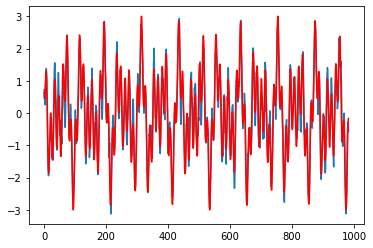

In [ ]:
# test how well CNN predicts now
test_data = []
cnn_test_batch = 0
for k in range(num_test_data-cnn_numinputs-1):
  test_data = np.concatenate((test_data,ypn[k:k+cnn_numinputs]));
  cnn_test_batch = cnn_test_batch + 1  
test_data = np.reshape(test_data, (cnn_test_batch,cnn_numinputs,num_cnn_features))
test_labels = y[cnn_numinputs:cnn_test_batch+cnn_numinputs]
cnn_predictions = model.predict(test_data).flatten()
keras_cnn_err = test_labels - cnn_predictions
plt.plot(cnn_predictions)
plt.plot(test_labels,'r')
plt.show()

#Hardik Chhabra

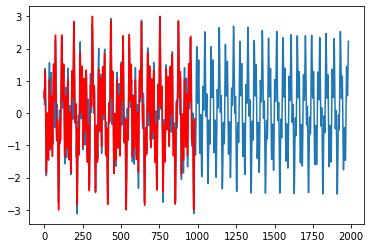

In [ ]:
#continue running CNN based on its own output
for k in range(1000):
  fb_data = np.reshape(cnn_predictions[len(cnn_predictions)-cnn_numinputs:],(1,cnn_numinputs,num_cnn_features))
  new_pred = model.predict(fb_data).flatten()
  cnn_predictions = np.concatenate((cnn_predictions, new_pred))
plt.plot(cnn_predictions)
plt.plot(test_labels,'r')
plt.show()

#Hardik Chhabra

In [ ]:
lstm_numinputs = 8
lstm_lookback = 4
train_data = []
lstm_train_batch = 0

# generate train data
for k in range(num_train_data-(lstm_numinputs*lstm_lookback)-1):
  train_data = np.concatenate((train_data,ypn[k:k+(lstm_lookback*lstm_numinputs)]));
  lstm_train_batch = lstm_train_batch + 1
train_data = np.reshape(train_data, (lstm_train_batch,lstm_lookback,lstm_numinputs))
train_labels = y[(lstm_lookback*lstm_numinputs):(lstm_lookback*lstm_numinputs)+lstm_train_batch]

# define LSTM model
def lstm_keras_model():
  model = keras.Sequential([
    tf.keras.layers.LSTM(16, activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],train_data.shape[2])),
    keras.layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.Adam()
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae']) 
  model.summary()
  return model

# train LSTM model
EPOCHS = 100
model = lstm_keras_model()
strt_time = datetime.datetime.now()
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                  validation_split=0.2, verbose=0,
                  callbacks=[])
curr_time = datetime.datetime.now()
timedelta = curr_time - strt_time
lstm_train_time = timedelta.total_seconds()
print("LSTM training done. Time elapsed: ", timedelta.total_seconds(), "s")
#plt.plot(history.epoch,np.array(history.history['val_loss']),label='Val loss')
#plt.show()

#Hardik Chhabra

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 16)                1600      
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,617
Trainable params: 1,617
Non-trainable params: 0
_________________________________________________________________
LSTM training done. Time elapsed:  37.929443 s


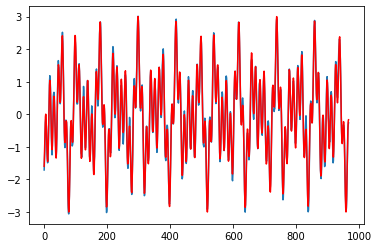

In [ ]:
# test how well LSTM predicts now
test_data = []
lstm_test_batch = 0
for k in range(num_test_data-(lstm_numinputs*lstm_lookback)-1):
  test_data = np.concatenate((test_data,ypn[k:k+(lstm_lookback*lstm_numinputs)]))
  lstm_test_batch = lstm_test_batch + 1
test_data = np.reshape(test_data, (lstm_test_batch,lstm_lookback,lstm_numinputs))
test_labels = y[(lstm_lookback*lstm_numinputs):(lstm_lookback*lstm_numinputs)+lstm_test_batch]
lstm_predictions = model.predict(test_data).flatten()
keras_lstm_err = test_labels - lstm_predictions
plt.plot(lstm_predictions)
plt.plot(test_labels,'r')
plt.show()

#Hardik Chhabra

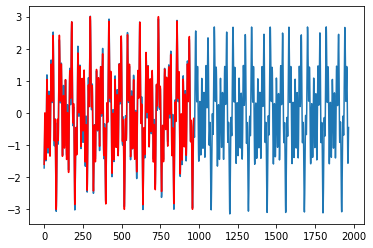

In [ ]:
#continue running LSTM based on its own output
for k in range(1000):
  fb_data = np.reshape(lstm_predictions[len(lstm_predictions)-(lstm_lookback*lstm_numinputs):],(1,lstm_lookback,lstm_numinputs))
  new_pred = model.predict(fb_data).flatten()
  lstm_predictions = np.concatenate((lstm_predictions, new_pred))
plt.plot(lstm_predictions)
plt.plot(test_labels,'r')
plt.show()

#Hardik Chhabra

In [ ]:
rnn_numinputs = 8
rnn_lookback = 4
train_data = []
rnn_train_batch = 0

# generate train data
for k in range(num_train_data-(rnn_numinputs*rnn_lookback)-1):
  train_data = np.concatenate((train_data,ypn[k:k+(rnn_lookback*rnn_numinputs)]));
  rnn_train_batch = rnn_train_batch + 1
train_data = np.reshape(train_data, (rnn_train_batch,rnn_lookback,rnn_numinputs))
train_labels = y[(rnn_lookback*rnn_numinputs):(rnn_lookback*rnn_numinputs)+rnn_train_batch]

# define LSTM model
def rnn_keras_model():
  model = keras.Sequential([
    tf.keras.layers.SimpleRNN(16, activation=tf.nn.relu,
                       input_shape=(train_data.shape[1],train_data.shape[2])),
    keras.layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers.Adam()
  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae']) 
  model.summary()
  return model

# train LSTM model
EPOCHS = 100
model = rnn_keras_model()
strt_time = datetime.datetime.now()
history = model.fit(train_data, train_labels, epochs=EPOCHS,
                  validation_split=0.2, verbose=0,
                  callbacks=[])
curr_time = datetime.datetime.now()
timedelta = curr_time - strt_time
rnn_train_time = timedelta.total_seconds()
print("RNN training done. Time elapsed: ", timedelta.total_seconds(), "s")
# plt.plot(history.epoch,np.array(history.history['val_loss']),label='Val loss')
# plt.show()

#Hardik Chhabra

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 16)                400       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
RNN training done. Time elapsed:  26.400183 s


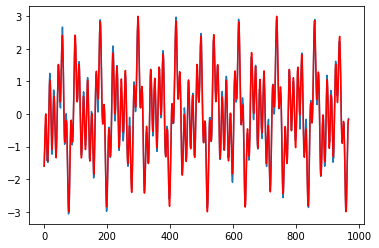

In [ ]:
# test how well LSTM predicts now
test_data = []
rnn_test_batch = 0
for k in range(num_test_data-(rnn_numinputs*rnn_lookback)-1):
  test_data = np.concatenate((test_data,ypn[k:k+(rnn_lookback*rnn_numinputs)]))
  rnn_test_batch = rnn_test_batch + 1
test_data = np.reshape(test_data, (rnn_test_batch,rnn_lookback,rnn_numinputs))
test_labels = y[(rnn_lookback*rnn_numinputs):(rnn_lookback*rnn_numinputs)+rnn_test_batch]
rnn_predictions = model.predict(test_data).flatten()
keras_rnn_err = test_labels - rnn_predictions
plt.plot(rnn_predictions)
plt.plot(test_labels,'r')
plt.show()

#Hardik Chhabra

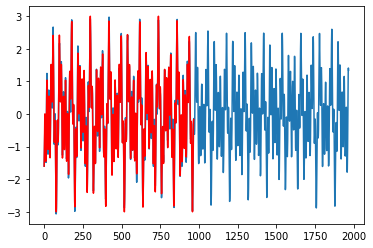

In [ ]:
#continue running LSTM based on its own output
for k in range(1000):
  fb_data = np.reshape(rnn_predictions[len(rnn_predictions)-(rnn_lookback*rnn_numinputs):],(1,rnn_lookback,rnn_numinputs))
  new_pred = model.predict(fb_data).flatten()
  rnn_predictions = np.concatenate((rnn_predictions, new_pred))
plt.plot(rnn_predictions)
plt.plot(test_labels,'r')
plt.show()

#Hardik Chhabra

In [ ]:
#plt.plot(dnn_predictions[1000:1200])
#plt.plot(lstm_predictions[1000+8:1200],'r')
#plt.show()
mse_cnn = np.mean(pow(keras_cnn_err,2))
mse_lstm = np.mean(pow(keras_lstm_err,2))
mse_rnn = np.mean(pow(keras_rnn_err,2))
print(f"MSE for RNN: {round(mse_rnn*100,3)}%\nMSE for CNN: {round(mse_cnn*100,3)}%\nMSE for LSTM: {round(mse_lstm*100,3)}%")

#Hardik Chhabra

MSE for RNN: 2.224%
MSE for CNN: 10.81%
MSE for LSTM: 1.747%


In [ ]:
# Summary of training run time
print("RNN training time: ", rnn_train_time, "s")
print("CNN training time: ", cnn_train_time, "s")
print("LSTM training time: ", lstm_train_time, "s")

#Hardik Chhabra

RNN training time:  26.400183 s
CNN training time:  41.507909 s
LSTM training time:  37.929443 s
